In [1]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [2]:
# device = torch.device('cpu')
# device

In [2]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import datetime
import math
from numpy.random import choice
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
import ta as ta


In [4]:
# import yfinance as yf

# # Define the ticker symbol
# ticker_symbol = "^GSPC"

# # Get data on this ticker
# sp500_data = yf.Ticker(ticker_symbol)

# # Get historical market data
# historical_data = sp500_data.history(interval="1m", start="2024-05-20", end="2024-05-27")



In [5]:
import requests
import pandas as pd

api_key = 'XPQXF0VKO06IFUEJ'
symbol = 'VLCN'
interval = '1min'
outputsize = 'full'

url = f'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={symbol}&interval={interval}&outputsize={outputsize}&apikey={api_key}'

response = requests.get(url)
data = response.json()

df = pd.DataFrame(data['Time Series (1min)']).T
df.columns = ['open', 'high', 'low', 'close', 'volume']
df.index = pd.to_datetime(df.index)
historical_data = df.astype(float)



In [6]:
data = historical_data
data

,open,high,low,close,volume
2024-06-13 19:59:00,6.10,6.36,6.10,6.24,3.0
2024-06-13 19:58:00,6.36,6.36,6.36,6.36,1.0
2024-06-13 19:57:00,6.24,6.24,6.24,6.24,1.0
2024-06-13 19:56:00,6.36,6.36,6.36,6.36,1.0
2024-06-13 19:50:00,6.16,6.16,6.16,6.16,1.0
...,...,...,...,...,...
2024-05-15 04:22:00,33.28,33.28,32.85,32.85,8.0
2024-05-15 04:21:00,35.10,35.50,35.10,35.50,0.0
2024-05-15 04:12:00,34.70,34.70,34.70,34.70,2.0
2024-05-15 04:11:00,34.70,34.70,34.70,34.70,0.0


In [7]:
import pandas as pd
import ta

# Load your stock data


# Calculate technical indicators
data['MA50'] = ta.trend.sma_indicator(data['close'], window=15)
data['RSI'] = ta.momentum.rsi(data['close'], window=15)
data['MACD'] = ta.trend.macd(data['close'])
data['BB_upper'] = ta.volatility.bollinger_hband(data['close'])
data['BB_lower'] = ta.volatility.bollinger_lband(data['close'])
data['ADX'] = ta.trend.adx(data['high'], data['low'], data['close'])
data['CCI'] = ta.trend.cci(data['high'], data['low'], data['close'])
data['ATR'] = ta.volatility.average_true_range(data['high'], data['low'], data['close'])
data['ROC'] = ta.momentum.roc(data['close'])
data['OBV'] = ta.volume.on_balance_volume(data['close'], data['volume'])

# Drop rows with NaN values (resulting from the indicator calculation)
data = data.dropna()

# Add more indicators as needed

# Drop rows with NaN values (resulting from the indicator calculation)
historical_data = data


In [8]:

# historical_data = historical_data[1:]
historical_data

,open,high,low,close,volume,MA50,RSI,MACD,BB_upper,BB_lower,ADX,CCI,ATR,ROC,OBV
2024-06-13 18:26:00,6.01,6.01,6.01,6.01,1.0,6.195400,41.659402,-0.049630,6.525313,5.948787,0.000000,-127.141516,0.141249,-3.993610,-866.0
2024-06-13 18:25:00,6.04,6.04,6.04,6.04,15.0,6.174067,43.051769,-0.055541,6.515692,5.926408,0.000000,-96.525206,0.133302,-0.330033,-851.0
2024-06-13 18:24:00,6.02,6.11,6.02,6.11,20.0,6.157400,46.258292,-0.053955,6.499744,5.917356,23.130459,-65.983560,0.130209,2.345059,-831.0
2024-06-13 18:23:00,6.02,6.02,6.02,6.02,1.0,6.141400,42.928568,-0.059277,6.483396,5.898704,22.921128,-89.776777,0.127337,-5.642633,-832.0
2024-06-13 18:15:00,6.11,6.11,6.11,6.11,1.0,6.144733,47.014918,-0.055592,6.462180,5.894920,22.039099,-34.178895,0.124670,-2.707006,-831.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-15 04:22:00,33.28,33.28,32.85,32.85,8.0,32.752000,50.909769,0.014783,35.246616,29.826384,14.148796,32.762330,1.530611,-6.116033,117269.0
2024-05-15 04:21:00,35.10,35.50,35.10,35.50,0.0,32.925333,56.882547,0.251200,35.688759,29.789241,15.156629,156.292634,1.610567,13.057325,117269.0
2024-05-15 04:12:00,34.70,34.70,34.70,34.70,2.0,33.129333,54.728753,0.369746,35.921631,29.826369,15.881074,100.508391,1.552670,9.119497,117267.0
2024-05-15 04:11:00,34.70,34.70,34.70,34.70,0.0,33.110000,54.728753,0.458411,36.128172,29.889828,16.553774,87.670305,1.441765,-1.139601,117267.0


In [10]:
historical_data = historical_data.drop(['open', 'high','low'], axis=1)

<Axes: >

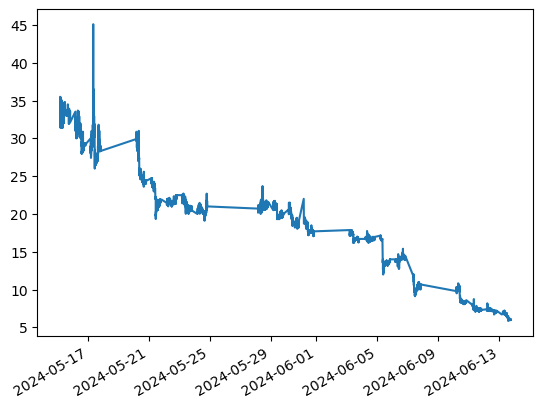

In [9]:
historical_data['close'].plot()

In [12]:
historical_data

,open,high,low,close,volume,MA50,RSI,MACD,BB_upper,BB_lower,ADX,CCI,ATR,ROC,OBV
2024-06-13 18:26:00,6.01,6.01,6.01,6.01,1.0,6.195400,41.659402,-0.049630,6.525313,5.948787,0.000000,-127.141516,0.141249,-3.993610,-866.0
2024-06-13 18:25:00,6.04,6.04,6.04,6.04,15.0,6.174067,43.051769,-0.055541,6.515692,5.926408,0.000000,-96.525206,0.133302,-0.330033,-851.0
2024-06-13 18:24:00,6.02,6.11,6.02,6.11,20.0,6.157400,46.258292,-0.053955,6.499744,5.917356,23.130459,-65.983560,0.130209,2.345059,-831.0
2024-06-13 18:23:00,6.02,6.02,6.02,6.02,1.0,6.141400,42.928568,-0.059277,6.483396,5.898704,22.921128,-89.776777,0.127337,-5.642633,-832.0
2024-06-13 18:15:00,6.11,6.11,6.11,6.11,1.0,6.144733,47.014918,-0.055592,6.462180,5.894920,22.039099,-34.178895,0.124670,-2.707006,-831.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-15 04:22:00,33.28,33.28,32.85,32.85,8.0,32.752000,50.909769,0.014783,35.246616,29.826384,14.148796,32.762330,1.530611,-6.116033,117269.0
2024-05-15 04:21:00,35.10,35.50,35.10,35.50,0.0,32.925333,56.882547,0.251200,35.688759,29.789241,15.156629,156.292634,1.610567,13.057325,117269.0
2024-05-15 04:12:00,34.70,34.70,34.70,34.70,2.0,33.129333,54.728753,0.369746,35.921631,29.826369,15.881074,100.508391,1.552670,9.119497,117267.0
2024-05-15 04:11:00,34.70,34.70,34.70,34.70,0.0,33.110000,54.728753,0.458411,36.128172,29.889828,16.553774,87.670305,1.441765,-1.139601,117267.0


In [13]:
historical_data_reversed_rows = historical_data.iloc[::-1].reset_index(drop=True)
print(historical_data_reversed_rows)


       open   high    low  close  volume       MA50        RSI      MACD  \
0     33.36  33.36  33.28  33.28     3.0  33.235333  50.808732  0.409377   
1     34.70  34.70  34.70  34.70     0.0  33.110000  54.728753  0.458411   
2     34.70  34.70  34.70  34.70     2.0  33.129333  54.728753  0.369746   
3     35.10  35.50  35.10  35.50     0.0  32.925333  56.882547  0.251200   
4     33.28  33.28  32.85  32.85     8.0  32.752000  50.909769  0.014783   
...     ...    ...    ...    ...     ...        ...        ...       ...   
9508   6.11   6.11   6.11   6.11     1.0   6.144733  47.014918 -0.055592   
9509   6.02   6.02   6.02   6.02     1.0   6.141400  42.928568 -0.059277   
9510   6.02   6.11   6.02   6.11    20.0   6.157400  46.258292 -0.053955   
9511   6.04   6.04   6.04   6.04    15.0   6.174067  43.051769 -0.055541   
9512   6.01   6.01   6.01   6.01     1.0   6.195400  41.659402 -0.049630   

       BB_upper   BB_lower        ADX         CCI       ATR        ROC  \
0     36.1590

In [14]:
historical_data = historical_data_reversed_rows

In [15]:
import gym
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from collections import deque
import random


In [16]:
import gym
import numpy as np
import pandas as pd

class StockTradingEnv(gym.Env):
    def __init__(self, df):
        super(StockTradingEnv, self).__init__()
        
        self.df = df
        self.current_step = 0
        self.prev_step =0
        self.balance = 1000000
        self.shares_held = 0
        self.total_shares_sold = 0
        self.total_sales_value = 0
        self.max_steps = len(df) - 1
        
        self.action_space = gym.spaces.Discrete(3)  # 0: Hold, 1: Buy, 2: Sell
        self.observation_space = gym.spaces.Box(low=0, high=np.inf, shape=(12,), dtype=np.float32)

        self.No_of_transactions =0
        
    
    def reset(self):
        self.current_step = 0
        self.prev_step =0
        self.balance = 1000000
        
        self.shares_held = 0
        self.total_shares_sold = 0
        self.total_sales_value = 0
        self.No_of_transactions =0

        return self._get_observation()
    
    def _get_observation(self):
        return np.array([
            # self.balance,
            # self.shares_held,
            # # self.total_shares_sold,
            # self.total_sales_value,
            self.df.iloc[self.current_step]['close'],
            self.df.iloc[self.current_step]['volume'],
            self.df.iloc[self.current_step]['MA50'],
            self.df.iloc[self.current_step]['RSI'],
            self.df.iloc[self.current_step]['MACD'],
            
            self.df.iloc[self.current_step]['BB_upper'],
            self.df.iloc[self.current_step]['BB_lower'],
            self.df.iloc[self.current_step]['ADX'],
            self.df.iloc[self.current_step]['CCI'],
            self.df.iloc[self.current_step]['ATR'],
            self.df.iloc[self.current_step]['ROC'],
            self.df.iloc[self.current_step]['OBV']
        
        ])
    def _get_primary_observations(self):
        return np.array([
            self.balance,
            self.shares_held,
            self.No_of_transactions,
          
          
            
        
        ])
    
    # def step(self, action):
    #     current_price = self.df.iloc[self.current_step]['close']
      
    #     prev_val = self.balance + self.shares_held*self.df.iloc[self.prev_step]['close']
        
    #     reward =0
    #     if action == 1:  # Buy
    #         self.shares_held += self.balance // current_price
    #         self.balance %= current_price
    #         self.prev_step = self.current_step
    #         reward =0
        
    #     elif action == 2:  # Sell
    #         if(self.shares_held!=0):
    #             self.No_of_transactions +=1
    #         self.balance += self.shares_held * current_price
    #         self.total_shares_sold += self.shares_held
    #         self.total_sales_value += self.shares_held * current_price
    #         self.shares_held = 0
    #         reward = self.balance  -prev_val
        
    #     self.current_step += 1
    #     done = self.current_step >= self.max_steps
    #     # reward = self.balance + self.shares_held * current_price + self.total_sales_value
       
        
    #     return self._get_observation(), reward, done, {}
    
    def render(self, mode='human'):
        print(f'Step: {self.current_step}')
        print(f'Balance: {self.balance}')
        print(f'Shares held: {self.shares_held}')
        print(f'Total sales value: {self.total_sales_value}')

# Example usage
data = historical_data
env = StockTradingEnv(data)


In [17]:
def get_state(df,step):
    return np.array([
            # self.balance,
            # self.shares_held,
            # # self.total_shares_sold,
            # self.total_sales_value,
           df.iloc[step]['close'],
           df.iloc[step]['volume'],
           df.iloc[step]['MA50'],
           df.iloc[step]['RSI'],
           df.iloc[step]['MACD'],
           df.iloc[step]['BB_upper'],
           df.iloc[step]['BB_lower'],
           df.iloc[step]['ADX'],
           df.iloc[step]['CCI'],
           df.iloc[step]['ATR'],
           df.iloc[step]['ROC'],
           df.iloc[step]['OBV']
        
        ]) 

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim

class DQN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 16)
        self.fc2 = nn.Linear(16,32)
        self.fc3 = nn.Linear(32,64)
        self.fc4 = nn.Linear(64, 32)
        self.fc5 = nn.Linear(32,16)
        self.fc6 = nn.Linear(16,8)
        self.fc7 = nn.Linear(8,4)
        self.fc8 = nn.Linear(4, output_dim)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = torch.relu(self.fc5(x))
        x = torch.relu(self.fc6(x))
        x = torch.relu(self.fc7(x))
        x = self.fc8(x)
        return x


In [19]:

# Example usage
input_dim = env.observation_space.shape[0]
output_dim = env.action_space.n
policy_net = DQN(input_dim, output_dim)
target_net = DQN(input_dim, output_dim)
target_net.load_state_dict(policy_net.state_dict())
target_net.eval()
input_dim

12

In [20]:
import random
from collections import deque

class DQNAgent:
    def __init__(self, env, policy_net, target_net, batch_size=4096, gamma=0.99, epsilon_start=1.0, epsilon_end=0.01, epsilon_decay=0.995):
        self.env = env
        self.policy_net = policy_net
        self.target_net = target_net
        self.batch_size = batch_size
        self.gamma = gamma
        self.epsilon = epsilon_start
        self.epsilon_end = epsilon_end
        self.epsilon_decay = epsilon_decay
        self.memory = deque(maxlen=10000)
        self.optimizer = optim.Adam(policy_net.parameters())
        self.loss_fn = nn.MSELoss()
    
    def select_action(self, state):
        if random.random() < self.epsilon:
            return self.env.action_space.sample()
        with torch.no_grad():
            state = torch.tensor(state, dtype=torch.float32).unsqueeze(0).to(device)
            q_values = self.policy_net(state)
            return q_values.argmax().item()
    
    def store_transition(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))
    
    def sample_memory(self):
        return random.sample(self.memory, self.batch_size)
    
    def update_policy(self):
        if len(self.memory) < self.batch_size:
            return
        
        transitions = self.sample_memory()
        batch = list(zip(*transitions))
        states =np.array(batch[0])

        states = torch.tensor(states, dtype=torch.float32).to(device)
        actions = torch.tensor(batch[1], dtype=torch.long).unsqueeze(1).to(device)
        rewards = torch.tensor(batch[2], dtype=torch.float32).unsqueeze(1).to(device)
        next_states = np.array(batch[3])
        next_states = torch.tensor(next_states, dtype=torch.float32).to(device)
        dones = torch.tensor(batch[4], dtype=torch.float32).unsqueeze(1).to(device)

        
        current_q_values = self.policy_net(states).gather(1, actions)
        max_next_q_values = self.target_net(next_states).max(1)[0].unsqueeze(1)
        expected_q_values = rewards + self.gamma * max_next_q_values * (1 - dones)
        
        loss = self.loss_fn(current_q_values, expected_q_values)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
        
        self.epsilon = max(self.epsilon_end, self.epsilon * self.epsilon_decay)

# Example usage



In [21]:
policy_net.to(device)
target_net.to(device)
agent = DQNAgent(env, policy_net, target_net)

In [22]:
num_episodes = 100
from tqdm import tqdm
for episode in range(num_episodes):
    # state = env.reset()
    total_reward = 0
    number_trans = 0
    wins =0
    lose = 0
    
    
    
    
    for step in tqdm(range(0,len(historical_data))):
        
        balance = 1000000
        shares_held = 0
        shares_sold =0
        state = get_state(historical_data,step)
        action = agent.select_action(state)
        done = False
        # print(action)
        current_price = historical_data.iloc[step]['close']
        if action ==1: ## BUY
            shares_held = balance//current_price
            balance %= current_price
            for tem_step in range(step,step+1800):
                if tem_step == len(historical_data)-1:
                    balance = balance + shares_held*historical_data.iloc[tem_step]['close']
                    next_state = get_state(historical_data,tem_step)
                    break
                if historical_data.iloc[tem_step]['close']>=1.007*current_price:
                    balance = balance + shares_held*historical_data.iloc[tem_step]['close']
                    next_state = get_state(historical_data,tem_step)
                    wins +=1
                    break
                ### Stop loss 
                if historical_data.iloc[tem_step]['close']<=0.995*current_price: 
                    balance = balance + shares_held*historical_data.iloc[tem_step]['close']
                    next_state = get_state(historical_data,tem_step)
                    lose += 1
                    break
            if step == len(historical_data)-1:
                done = True
            number_trans +=1
            reward =  balance -1000000
            total_reward += reward
            agent.store_transition(state, action, reward, next_state, done)
            agent.update_policy()
        
        if action==2: ## Sell  short
            No_shares_sold = 0.8*balance//current_price
            shares_sell = No_shares_sold*current_price
            for tem_step in range(step,step+1800):
                if tem_step == len(historical_data)-1:
                    shares_buy = No_shares_sold*historical_data.iloc[tem_step]['close']
                    next_state = get_state(historical_data,tem_step)
                    break
                if historical_data.iloc[tem_step]['close']>=1.005*current_price:
                    shares_buy =  No_shares_sold*historical_data.iloc[tem_step]['close']
                    next_state = get_state(historical_data,tem_step)
                    lose +=1
                    break
                ### Stop loss 
                if historical_data.iloc[tem_step]['close']<=0.993*current_price: 
                    shares_buy =  No_shares_sold*historical_data.iloc[tem_step]['close']
                    next_state = get_state(historical_data,tem_step)
                    wins +=1
                    break
            if step == len(historical_data)-1:
                done = True
            number_trans +=1
            reward =  shares_sell -shares_buy
            total_reward += reward
            agent.store_transition(state, action, reward, next_state, done)
            agent.update_policy()
       






            
        # next_state, reward, done, _ = env.step(action)
        # balance,shares_held,no_oftrans = env._get_primary_observations()
        
        # agent.store_transition(state, action, reward, next_state, done)
        # agent.update_policy()
        # state = next_state
        # total_reward += reward
        # print(f'Episode {episode + 1}, Total Reward: {total_reward}')
        
        
    print(f'Episode {episode + 1}, Total Reward: {total_reward}')
    print(f'Number of transcations: {number_trans}, Wins: {wins}, Lose: {lose} ')
            
    
    # Update the target network
    if episode % 10 == 0:
        target_net.load_state_dict(policy_net.state_dict())
    torch.save(policy_net.state_dict(), f'dqn_model_Sell_short_Volcon {episode+1}.pth')


# Save the trained model


100%|██████████| 9513/9513 [00:50<00:00, 190.21it/s] 


Episode 1, Total Reward: 23513527.16499997
Number of transcations: 6572, Wins: 3591, Lose: 2979 


100%|██████████| 9513/9513 [03:05<00:00, 51.24it/s]


Episode 2, Total Reward: 88299557.47699954
Number of transcations: 9479, Wins: 7020, Lose: 2457 


100%|██████████| 9513/9513 [03:09<00:00, 50.17it/s]


Episode 3, Total Reward: 89009149.79799949
Number of transcations: 9478, Wins: 7061, Lose: 2415 


100%|██████████| 9513/9513 [03:21<00:00, 47.13it/s]


Episode 4, Total Reward: 89927406.97799948
Number of transcations: 9486, Wins: 7088, Lose: 2396 


100%|██████████| 9513/9513 [03:21<00:00, 47.22it/s]


Episode 5, Total Reward: 91062893.45599928
Number of transcations: 9479, Wins: 7133, Lose: 2345 


100%|██████████| 9513/9513 [02:54<00:00, 54.45it/s]


Episode 6, Total Reward: 92098796.11099915
Number of transcations: 9474, Wins: 7148, Lose: 2324 


100%|██████████| 9513/9513 [03:09<00:00, 50.13it/s]


Episode 7, Total Reward: 91149025.46299927
Number of transcations: 9465, Wins: 7097, Lose: 2366 


100%|██████████| 9513/9513 [02:52<00:00, 55.26it/s]


Episode 8, Total Reward: 92855411.10999921
Number of transcations: 9481, Wins: 7183, Lose: 2296 


100%|██████████| 9513/9513 [03:00<00:00, 52.73it/s]


Episode 9, Total Reward: 95177629.87699948
Number of transcations: 9484, Wins: 7248, Lose: 2234 


100%|██████████| 9513/9513 [03:02<00:00, 52.04it/s]


Episode 10, Total Reward: 94568649.15399924
Number of transcations: 9484, Wins: 7222, Lose: 2260 


100%|██████████| 9513/9513 [03:02<00:00, 52.24it/s]


Episode 11, Total Reward: 95886488.0469994
Number of transcations: 9480, Wins: 7269, Lose: 2209 


100%|██████████| 9513/9513 [03:08<00:00, 50.38it/s]


Episode 12, Total Reward: 68335277.45599978
Number of transcations: 9481, Wins: 6335, Lose: 3144 


100%|██████████| 9513/9513 [03:05<00:00, 51.35it/s]


Episode 13, Total Reward: 87258225.9679994
Number of transcations: 9485, Wins: 7023, Lose: 2460 


100%|██████████| 9513/9513 [03:11<00:00, 49.56it/s]


Episode 14, Total Reward: 91523268.01699935
Number of transcations: 9489, Wins: 7130, Lose: 2357 


100%|██████████| 9513/9513 [03:11<00:00, 49.72it/s]


Episode 15, Total Reward: 91440093.2649993
Number of transcations: 9487, Wins: 7122, Lose: 2363 


100%|██████████| 9513/9513 [03:20<00:00, 47.44it/s]


Episode 16, Total Reward: 18565167.184999973
Number of transcations: 9482, Wins: 4804, Lose: 4676 


100%|██████████| 9513/9513 [03:21<00:00, 47.18it/s]


Episode 17, Total Reward: 89542327.13599889
Number of transcations: 9480, Wins: 7098, Lose: 2380 


100%|██████████| 9513/9513 [03:17<00:00, 48.28it/s]


Episode 18, Total Reward: 90984846.98899905
Number of transcations: 9481, Wins: 7141, Lose: 2338 


100%|██████████| 9513/9513 [03:38<00:00, 43.60it/s]


Episode 19, Total Reward: 92259066.85399926
Number of transcations: 9483, Wins: 7191, Lose: 2290 


100%|██████████| 9513/9513 [03:50<00:00, 41.35it/s]


Episode 20, Total Reward: 93732788.03699932
Number of transcations: 9491, Wins: 7216, Lose: 2273 


100%|██████████| 9513/9513 [03:46<00:00, 41.95it/s]


Episode 21, Total Reward: 93511749.2589993
Number of transcations: 9474, Wins: 7200, Lose: 2272 


100%|██████████| 9513/9513 [04:38<00:00, 34.19it/s]


Episode 22, Total Reward: 93369495.99699949
Number of transcations: 9485, Wins: 7193, Lose: 2290 


100%|██████████| 9513/9513 [04:35<00:00, 34.47it/s]


Episode 23, Total Reward: 93806169.05299933
Number of transcations: 9477, Wins: 7205, Lose: 2270 


100%|██████████| 9513/9513 [1:54:51<00:00,  1.38it/s]      


Episode 24, Total Reward: 92984658.4659993
Number of transcations: 9475, Wins: 7177, Lose: 2297 


100%|██████████| 9513/9513 [11:14<00:00, 14.11it/s]


Episode 25, Total Reward: 93432642.33399945
Number of transcations: 9488, Wins: 7187, Lose: 2299 


100%|██████████| 9513/9513 [09:22<00:00, 16.91it/s]


Episode 26, Total Reward: 93352021.98599938
Number of transcations: 9484, Wins: 7198, Lose: 2284 


100%|██████████| 9513/9513 [11:14<00:00, 14.11it/s]


Episode 27, Total Reward: 93298232.9559994
Number of transcations: 9474, Wins: 7186, Lose: 2286 


100%|██████████| 9513/9513 [09:52<00:00, 16.06it/s]


Episode 28, Total Reward: 93800276.05699946
Number of transcations: 9484, Wins: 7206, Lose: 2276 


100%|██████████| 9513/9513 [08:56<00:00, 17.73it/s]


Episode 29, Total Reward: 93063423.50299935
Number of transcations: 9472, Wins: 7193, Lose: 2277 


100%|██████████| 9513/9513 [08:18<00:00, 19.09it/s]


Episode 30, Total Reward: 94047864.28199942
Number of transcations: 9473, Wins: 7225, Lose: 2246 


100%|██████████| 9513/9513 [04:50<00:00, 32.78it/s]


Episode 31, Total Reward: 93047719.02799928
Number of transcations: 9483, Wins: 7188, Lose: 2293 


100%|██████████| 9513/9513 [03:28<00:00, 45.67it/s]


Episode 32, Total Reward: 92548389.40099937
Number of transcations: 9484, Wins: 7186, Lose: 2296 


100%|██████████| 9513/9513 [03:44<00:00, 42.41it/s]


Episode 33, Total Reward: 77530588.2909995
Number of transcations: 9470, Wins: 6682, Lose: 2786 


100%|██████████| 9513/9513 [03:53<00:00, 40.79it/s]


Episode 34, Total Reward: 57123098.94599999
Number of transcations: 9480, Wins: 6127, Lose: 3351 


100%|██████████| 9513/9513 [04:40<00:00, 33.85it/s]


Episode 35, Total Reward: 89239681.863999
Number of transcations: 9478, Wins: 7040, Lose: 2436 


100%|██████████| 9513/9513 [04:23<00:00, 36.06it/s]


Episode 36, Total Reward: 31133914.416000035
Number of transcations: 9487, Wins: 5091, Lose: 4394 


100%|██████████| 9513/9513 [04:10<00:00, 37.91it/s]


Episode 37, Total Reward: 76547475.8679996
Number of transcations: 9478, Wins: 6793, Lose: 2683 


100%|██████████| 9513/9513 [04:44<00:00, 33.43it/s]


Episode 38, Total Reward: 81379715.85699941
Number of transcations: 9475, Wins: 6867, Lose: 2606 


100%|██████████| 9513/9513 [04:46<00:00, 33.18it/s]


Episode 39, Total Reward: 81781370.15799934
Number of transcations: 9475, Wins: 6869, Lose: 2604 


100%|██████████| 9513/9513 [04:50<00:00, 32.77it/s]


Episode 40, Total Reward: 80558685.86799966
Number of transcations: 9479, Wins: 6860, Lose: 2617 


100%|██████████| 9513/9513 [04:05<00:00, 38.75it/s]


Episode 41, Total Reward: 81798907.9939996
Number of transcations: 9493, Wins: 6888, Lose: 2603 


100%|██████████| 9513/9513 [03:48<00:00, 41.66it/s]


Episode 42, Total Reward: 83870699.60599937
Number of transcations: 9484, Wins: 6927, Lose: 2555 


100%|██████████| 9513/9513 [03:46<00:00, 42.06it/s]


Episode 43, Total Reward: 83071208.76899941
Number of transcations: 9479, Wins: 6916, Lose: 2561 


100%|██████████| 9513/9513 [03:38<00:00, 43.61it/s]


Episode 44, Total Reward: 82837027.88999966
Number of transcations: 9477, Wins: 6932, Lose: 2543 


100%|██████████| 9513/9513 [04:13<00:00, 37.54it/s]


Episode 45, Total Reward: 83637863.68599959
Number of transcations: 9479, Wins: 6931, Lose: 2546 


100%|██████████| 9513/9513 [04:47<00:00, 33.14it/s]


Episode 46, Total Reward: 83346205.2509996
Number of transcations: 9480, Wins: 6927, Lose: 2551 


100%|██████████| 9513/9513 [04:46<00:00, 33.25it/s]


Episode 47, Total Reward: 84077680.1299996
Number of transcations: 9488, Wins: 6924, Lose: 2562 


100%|██████████| 9513/9513 [04:41<00:00, 33.74it/s]


Episode 48, Total Reward: 84704540.71699962
Number of transcations: 9487, Wins: 6921, Lose: 2564 


100%|██████████| 9513/9513 [04:42<00:00, 33.72it/s]


Episode 49, Total Reward: 84093278.46999978
Number of transcations: 9480, Wins: 6914, Lose: 2564 


100%|██████████| 9513/9513 [04:41<00:00, 33.75it/s]


Episode 50, Total Reward: 84034502.06799966
Number of transcations: 9477, Wins: 6899, Lose: 2576 


100%|██████████| 9513/9513 [04:41<00:00, 33.79it/s]


Episode 51, Total Reward: 84565350.40099977
Number of transcations: 9477, Wins: 6911, Lose: 2564 


100%|██████████| 9513/9513 [04:57<00:00, 31.99it/s]


Episode 52, Total Reward: 83699029.3179997
Number of transcations: 9485, Wins: 6896, Lose: 2587 


100%|██████████| 9513/9513 [04:57<00:00, 32.01it/s]


Episode 53, Total Reward: 84440259.88199979
Number of transcations: 9478, Wins: 6917, Lose: 2559 


100%|██████████| 9513/9513 [04:37<00:00, 34.31it/s]


Episode 54, Total Reward: 84998660.9549997
Number of transcations: 9484, Wins: 6922, Lose: 2560 


100%|██████████| 9513/9513 [04:26<00:00, 35.67it/s]


Episode 55, Total Reward: 85432171.09399965
Number of transcations: 9487, Wins: 6941, Lose: 2544 


100%|██████████| 9513/9513 [04:22<00:00, 36.26it/s]


Episode 56, Total Reward: 81806452.50499962
Number of transcations: 9484, Wins: 6834, Lose: 2648 


100%|██████████| 9513/9513 [04:22<00:00, 36.30it/s]


Episode 57, Total Reward: 83283083.9879996
Number of transcations: 9477, Wins: 6878, Lose: 2597 


100%|██████████| 9513/9513 [04:22<00:00, 36.29it/s]


Episode 58, Total Reward: 84228618.36599973
Number of transcations: 9478, Wins: 6917, Lose: 2559 


100%|██████████| 9513/9513 [04:22<00:00, 36.21it/s]


Episode 59, Total Reward: 85515652.71099953
Number of transcations: 9473, Wins: 6943, Lose: 2528 


100%|██████████| 9513/9513 [04:25<00:00, 35.84it/s]


Episode 60, Total Reward: 84228866.9929997
Number of transcations: 9478, Wins: 6910, Lose: 2566 


100%|██████████| 9513/9513 [04:22<00:00, 36.29it/s]


Episode 61, Total Reward: 85418493.65899967
Number of transcations: 9477, Wins: 6926, Lose: 2549 


100%|██████████| 9513/9513 [04:23<00:00, 36.05it/s]


Episode 62, Total Reward: 84760257.44599973
Number of transcations: 9484, Wins: 6911, Lose: 2571 


100%|██████████| 9513/9513 [04:22<00:00, 36.17it/s]


Episode 63, Total Reward: 85593273.13199961
Number of transcations: 9482, Wins: 6946, Lose: 2534 


100%|██████████| 9513/9513 [04:22<00:00, 36.23it/s]


Episode 64, Total Reward: 84380711.80999959
Number of transcations: 9480, Wins: 6921, Lose: 2557 


100%|██████████| 9513/9513 [04:22<00:00, 36.28it/s]


Episode 65, Total Reward: 80269261.03599963
Number of transcations: 9481, Wins: 6828, Lose: 2651 


100%|██████████| 9513/9513 [04:23<00:00, 36.10it/s]


Episode 66, Total Reward: 81591918.3349997
Number of transcations: 9472, Wins: 6860, Lose: 2610 


100%|██████████| 9513/9513 [04:24<00:00, 36.02it/s]


Episode 67, Total Reward: 83005902.05199954
Number of transcations: 9485, Wins: 6878, Lose: 2605 


100%|██████████| 9513/9513 [04:22<00:00, 36.29it/s]


Episode 68, Total Reward: 84514552.16599962
Number of transcations: 9478, Wins: 6911, Lose: 2565 


100%|██████████| 9513/9513 [04:23<00:00, 36.15it/s]


Episode 69, Total Reward: 76167874.5159999
Number of transcations: 9480, Wins: 6725, Lose: 2753 


100%|██████████| 9513/9513 [04:24<00:00, 36.00it/s]


Episode 70, Total Reward: 61615162.220999755
Number of transcations: 9487, Wins: 6109, Lose: 3376 


100%|██████████| 9513/9513 [04:22<00:00, 36.20it/s]


Episode 71, Total Reward: 75603648.70799975
Number of transcations: 9481, Wins: 6642, Lose: 2837 


100%|██████████| 9513/9513 [04:23<00:00, 36.12it/s]


Episode 72, Total Reward: 78726289.06599961
Number of transcations: 9488, Wins: 6700, Lose: 2786 


100%|██████████| 9513/9513 [04:22<00:00, 36.28it/s]


Episode 73, Total Reward: 48707482.74899978
Number of transcations: 9484, Wins: 5987, Lose: 3495 


100%|██████████| 9513/9513 [04:24<00:00, 36.03it/s]


Episode 74, Total Reward: -5295576.650000025
Number of transcations: 9476, Wins: 4414, Lose: 5060 


100%|██████████| 9513/9513 [04:30<00:00, 35.18it/s]


Episode 75, Total Reward: 482517.9619999875
Number of transcations: 9478, Wins: 4553, Lose: 4923 


100%|██████████| 9513/9513 [04:24<00:00, 36.02it/s]


Episode 76, Total Reward: 244199.2479999886
Number of transcations: 9490, Wins: 4556, Lose: 4932 


100%|██████████| 9513/9513 [04:23<00:00, 36.05it/s]


Episode 77, Total Reward: 321499.55399998813
Number of transcations: 9476, Wins: 4548, Lose: 4926 


100%|██████████| 9513/9513 [04:23<00:00, 36.11it/s]


Episode 78, Total Reward: 604475.5109999886
Number of transcations: 9474, Wins: 4557, Lose: 4915 


100%|██████████| 9513/9513 [04:22<00:00, 36.30it/s]


Episode 79, Total Reward: 572035.906999991
Number of transcations: 9481, Wins: 4558, Lose: 4921 


100%|██████████| 9513/9513 [04:21<00:00, 36.41it/s]


Episode 80, Total Reward: 200977.35899999214
Number of transcations: 9484, Wins: 4552, Lose: 4930 


100%|██████████| 9513/9513 [04:22<00:00, 36.28it/s]


Episode 81, Total Reward: 198745.6539999873
Number of transcations: 9481, Wins: 4552, Lose: 4927 


100%|██████████| 9513/9513 [04:21<00:00, 36.36it/s]


Episode 82, Total Reward: -508142.30900001177
Number of transcations: 9477, Wins: 4529, Lose: 4946 


100%|██████████| 9513/9513 [04:22<00:00, 36.28it/s]


Episode 83, Total Reward: -125938.21200001042
Number of transcations: 9479, Wins: 4534, Lose: 4943 


100%|██████████| 9513/9513 [04:22<00:00, 36.29it/s]


Episode 84, Total Reward: 284998.0399999878
Number of transcations: 9490, Wins: 4560, Lose: 4928 


100%|██████████| 9513/9513 [04:21<00:00, 36.34it/s]


Episode 85, Total Reward: 500793.71699998947
Number of transcations: 9474, Wins: 4558, Lose: 4914 


100%|██████████| 9513/9513 [04:21<00:00, 36.42it/s]


Episode 86, Total Reward: -271920.5510000059
Number of transcations: 9487, Wins: 4568, Lose: 4917 


100%|██████████| 9513/9513 [04:21<00:00, 36.40it/s]


Episode 87, Total Reward: -116876.0300000076
Number of transcations: 9477, Wins: 4543, Lose: 4932 


100%|██████████| 9513/9513 [04:29<00:00, 35.31it/s]


Episode 88, Total Reward: 296802.22799999383
Number of transcations: 9467, Wins: 4550, Lose: 4915 


100%|██████████| 9513/9513 [04:35<00:00, 34.51it/s]


Episode 89, Total Reward: 6731.011999993818
Number of transcations: 9480, Wins: 4520, Lose: 4958 


100%|██████████| 9513/9513 [04:45<00:00, 33.30it/s]


Episode 90, Total Reward: 578069.2219999862
Number of transcations: 9482, Wins: 4559, Lose: 4921 


100%|██████████| 9513/9513 [04:44<00:00, 33.41it/s]


Episode 91, Total Reward: -366155.56500000623
Number of transcations: 9487, Wins: 4532, Lose: 4953 


100%|██████████| 9513/9513 [04:44<00:00, 33.39it/s]


Episode 92, Total Reward: 73733.87899998936
Number of transcations: 9482, Wins: 4547, Lose: 4933 


100%|██████████| 9513/9513 [04:45<00:00, 33.36it/s]


Episode 93, Total Reward: 453503.1809999901
Number of transcations: 9492, Wins: 4562, Lose: 4928 


100%|██████████| 9513/9513 [04:44<00:00, 33.44it/s]


Episode 94, Total Reward: -270324.79900000535
Number of transcations: 9482, Wins: 4547, Lose: 4933 


100%|██████████| 9513/9513 [04:45<00:00, 33.34it/s]


Episode 95, Total Reward: 338198.19899998826
Number of transcations: 9485, Wins: 4557, Lose: 4926 


100%|██████████| 9513/9513 [04:43<00:00, 33.53it/s]


Episode 96, Total Reward: -1057586.472999989
Number of transcations: 9469, Wins: 4518, Lose: 4949 


100%|██████████| 9513/9513 [04:45<00:00, 33.35it/s]


Episode 97, Total Reward: 869976.0710000144
Number of transcations: 9482, Wins: 4283, Lose: 5197 


100%|██████████| 9513/9513 [04:44<00:00, 33.38it/s]


Episode 98, Total Reward: 423312.4220000183
Number of transcations: 9476, Wins: 4251, Lose: 5223 


100%|██████████| 9513/9513 [04:44<00:00, 33.45it/s]


Episode 99, Total Reward: 483084.84900001355
Number of transcations: 9488, Wins: 4266, Lose: 5220 


100%|██████████| 9513/9513 [04:45<00:00, 33.32it/s]


Episode 100, Total Reward: 566539.9990000137
Number of transcations: 9488, Wins: 4264, Lose: 5222 


: 

In [135]:
import yfinance as yf
import pandas as pd

# Define the stock symbol and date range
symbol = 'AAPL'
start_date = '2023-06-01'
end_date = '2024-06-01'

# Fetch the data
df = yf.download(symbol, start=start_date, end=end_date, interval='1m')

print(df)


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['AAPL']: YFChartError('%ticker%: 1m data not available for startTime=1685592000 and endTime=1717214400. Only 7 days worth of 1m granularity data are allowed to be fetched per request.')


Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []


In [136]:
XPQXF0VKO06IFUEJ

NameError: name 'XPQXF0VKO06IFUEJ' is not defined

In [143]:
import requests
import pandas as pd

api_key = 'XPQXF0VKO06IFUEJ'
symbol = 'SPY'
interval = '1min'
outputsize = 'full'

url = f'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={symbol}&interval={interval}&outputsize={outputsize}&apikey={api_key}'

response = requests.get(url)
data = response.json()

df = pd.DataFrame(data['Time Series (1min)']).T
df.columns = ['open', 'high', 'low', 'close', 'volume']
df.index = pd.to_datetime(df.index)
df = df.astype(float)

print(df)


                        open    high      low   close     volume
2024-06-12 20:00:00  541.360  541.36  541.360  541.36  1170516.0
2024-06-12 19:59:00  542.230  542.24  542.220  542.23     3441.0
2024-06-12 19:58:00  542.165  542.24  542.165  542.24     2098.0
2024-06-12 19:57:00  542.150  542.18  542.150  542.18     1066.0
2024-06-12 19:56:00  542.160  542.19  542.140  542.16      534.0
...                      ...     ...      ...     ...        ...
2024-05-14 04:05:00  521.070  521.09  521.040  521.09      120.0
2024-05-14 04:03:00  521.050  521.09  521.030  521.03      348.0
2024-05-14 04:02:00  521.020  521.08  521.020  521.08       43.0
2024-05-14 04:01:00  520.990  521.03  520.990  521.03       20.0
2024-05-14 04:00:00  522.240  522.24  520.820  521.03      144.0

[19708 rows x 5 columns]


In [144]:
df.iloc[-1]

open      522.24
high      522.24
low       520.82
close     521.03
volume    144.00
Name: 2024-05-14 04:00:00, dtype: float64

In [21]:
len(historical_data)

19683

In [51]:
historical_data.iloc[0]['close']

521.03